# Stock Market Analysis (2020–2025)
##Dataset Overview
Source: all_stocks_5yr.csv (2020–2025)

###Total Records: 619,040

Date Range: February 8, 2020 – February 7, 2025

Total Companies: 505 unique stock tickers

#Key Insights
## Most Frequently Traded Stocks (by entries):
###Ticker	Entries
AAL	1259
NRG	1259
NOC	1259
NLSN	1259
NKE	1259

##Most Actively Traded Stocks (by average daily volume):
Ticker	Avg Volume
BAC	93.6M
AAPL	54.0M
GE	42.1M
F	34.5M
FB	34.4M

##Visualizations
###1. Stock Price Trends (2020–2025)
Companies: AAPL, GOOG, AMZN, MSFT, FB

Shows rising trends and volatility across major tech companies.

###2. Top 20 Companies by Average Trading Volume
Reveals which stocks were most active by market participation.

###3. Distribution of Daily Closing Prices
Most stocks cluster in lower price ranges with a few high-flyers.

###4. AMZN High vs. Low Prices Over Time
Filled area shows volatility. Useful for spotting spikes or stable phases.

###5. Top 10 Daily Profits (e.g., March 15, 2021)
Computed as: close - open

Shows companies with highest intraday gains on a selected day.

###6. FB daily returns
show the companies of facebook daily returns

##Recommendations / Uses
Portfolio Planning: Use volume and volatility to decide entry points.

Risk Analysis: Use high/low spreads to measure historical volatility.

Simulation Training: The date-shifted version mimics recent market behavior for educational purposes.

##Technical Highlights
Used pandas for data manipulation.

Used matplotlib and seaborn for visualization.

Dates shifted using pd.DateOffset(years=7) for relevance.

        date Name
0 2020-02-08  AAL
1 2020-02-11  AAL
2 2020-02-12  AAL
3 2020-02-13  AAL
4 2020-02-14  AAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


date   open   high    low  close    volume Name
0 2020-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1 2020-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2 2020-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3 2020-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4 2020-02-14  14.94  14.96  13.16  13.99  31879900  AAL

From: 2020-02-08 00:00:00 To: 2025-02-07 00:00:00


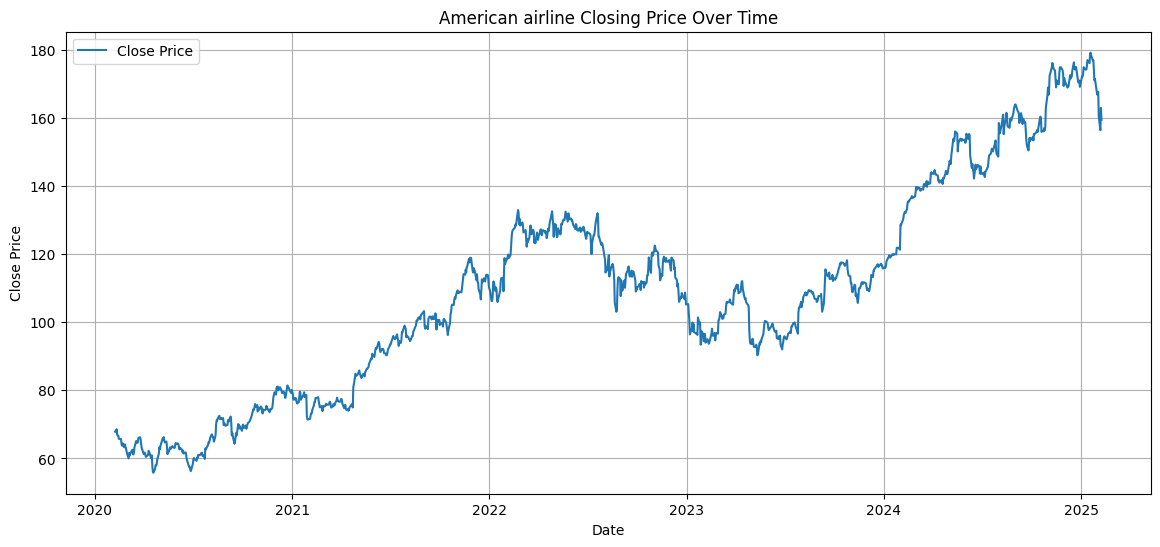

/tmp/ipython-input-4247951986.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


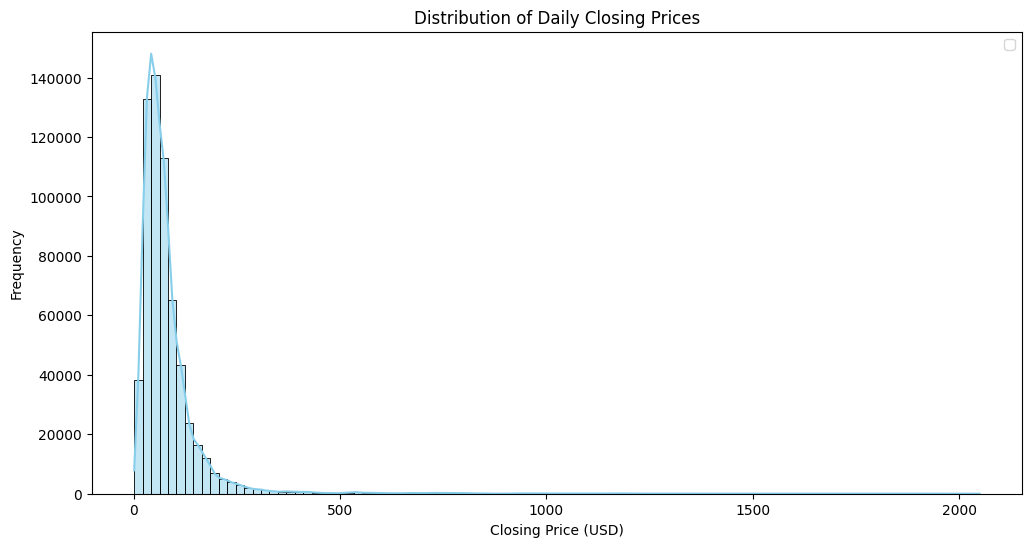

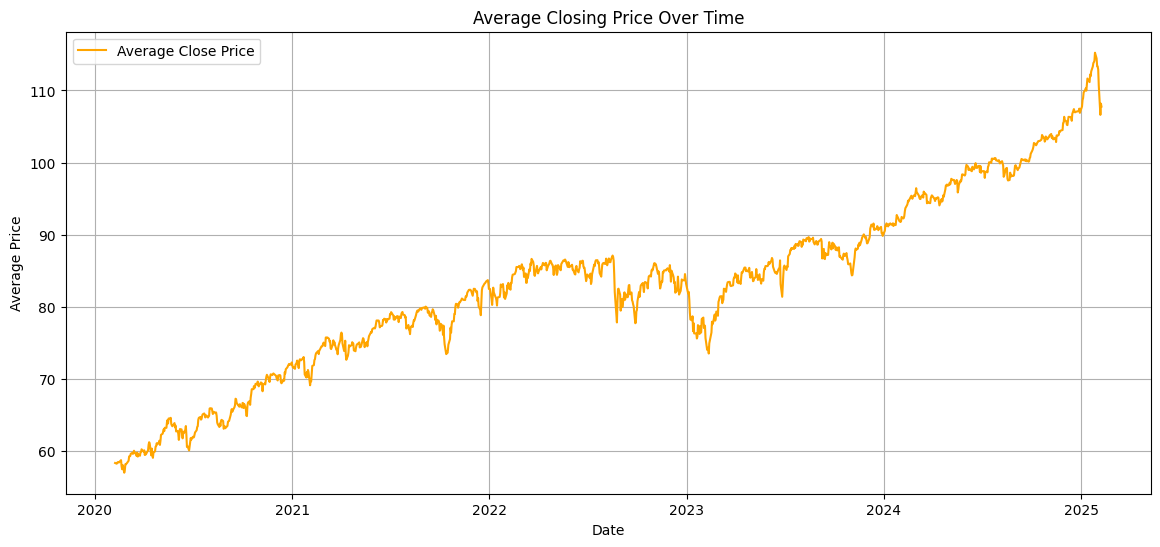

/tmp/ipython-input-4247951986.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_volume.index, y=top_volume.values, palette='viridis')


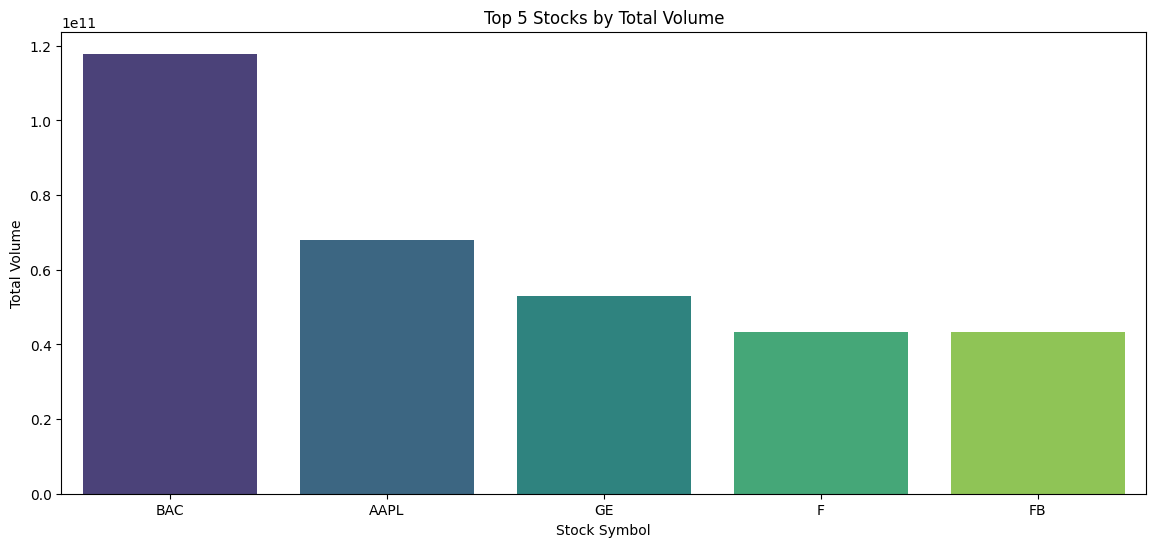

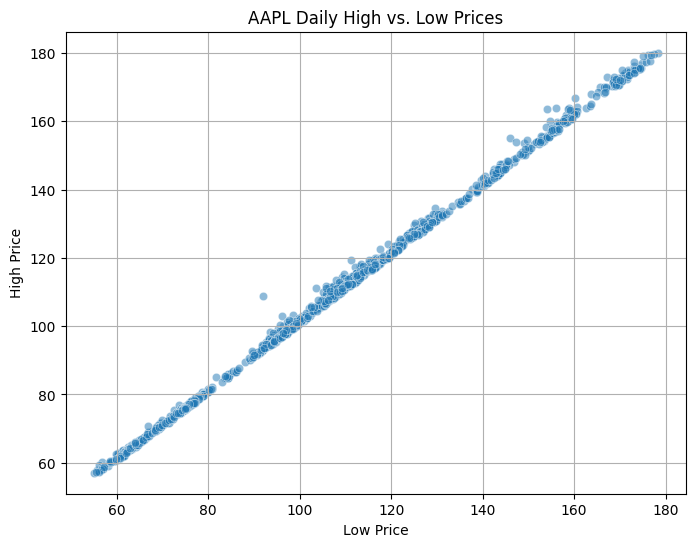

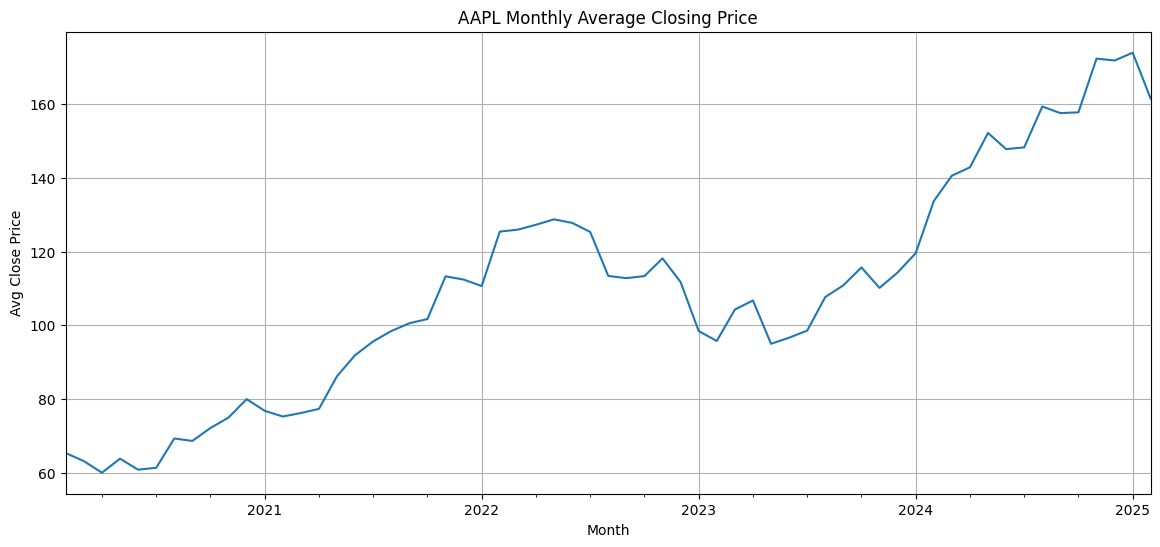

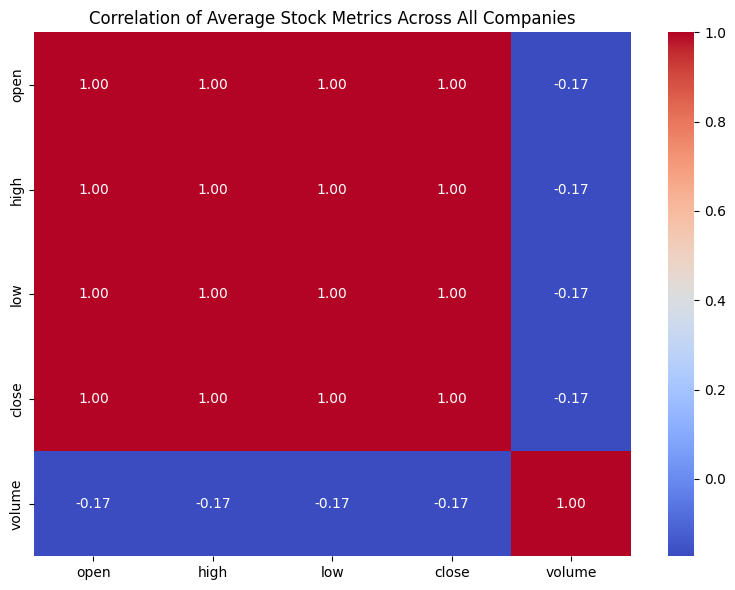

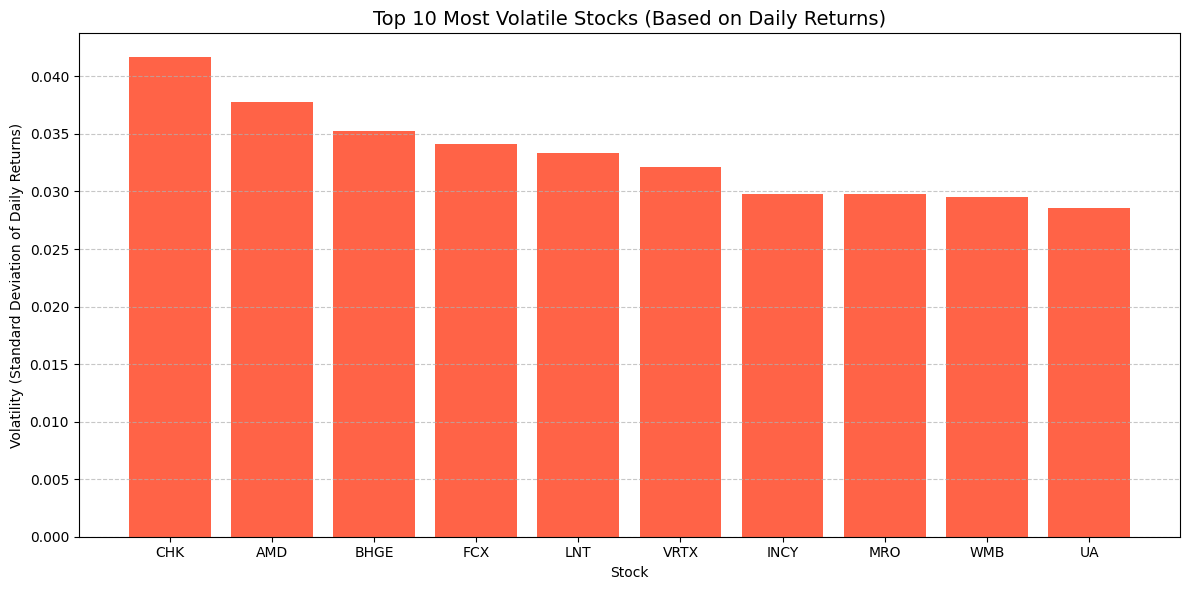

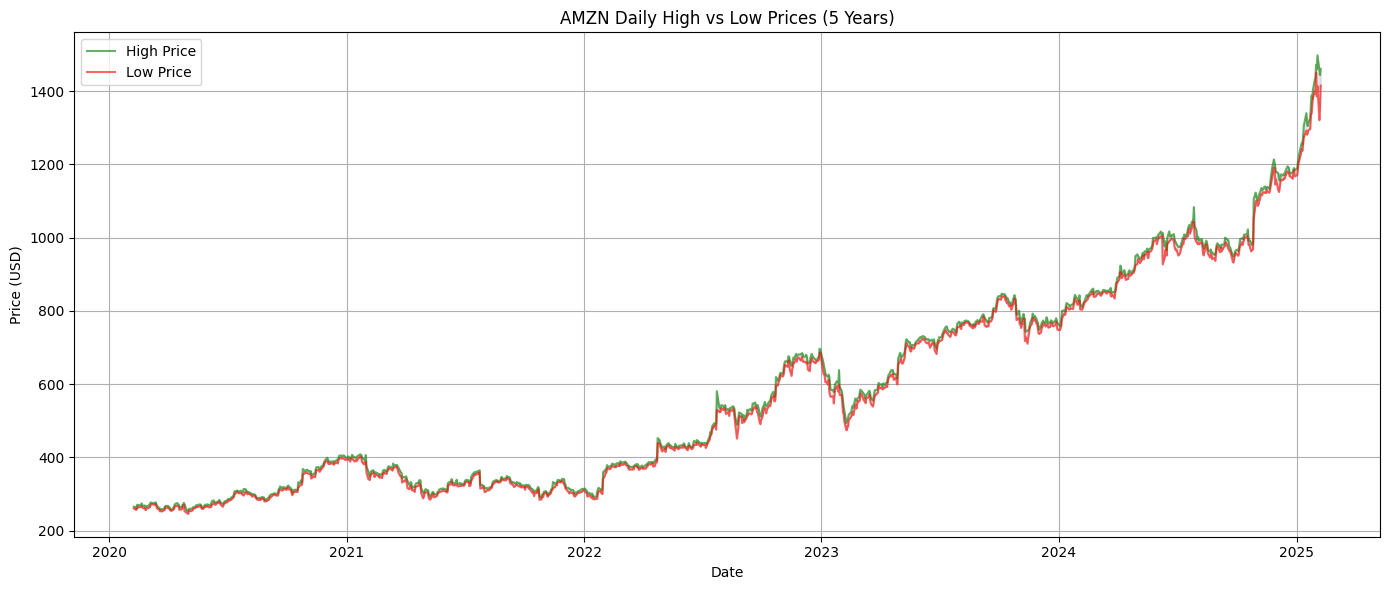

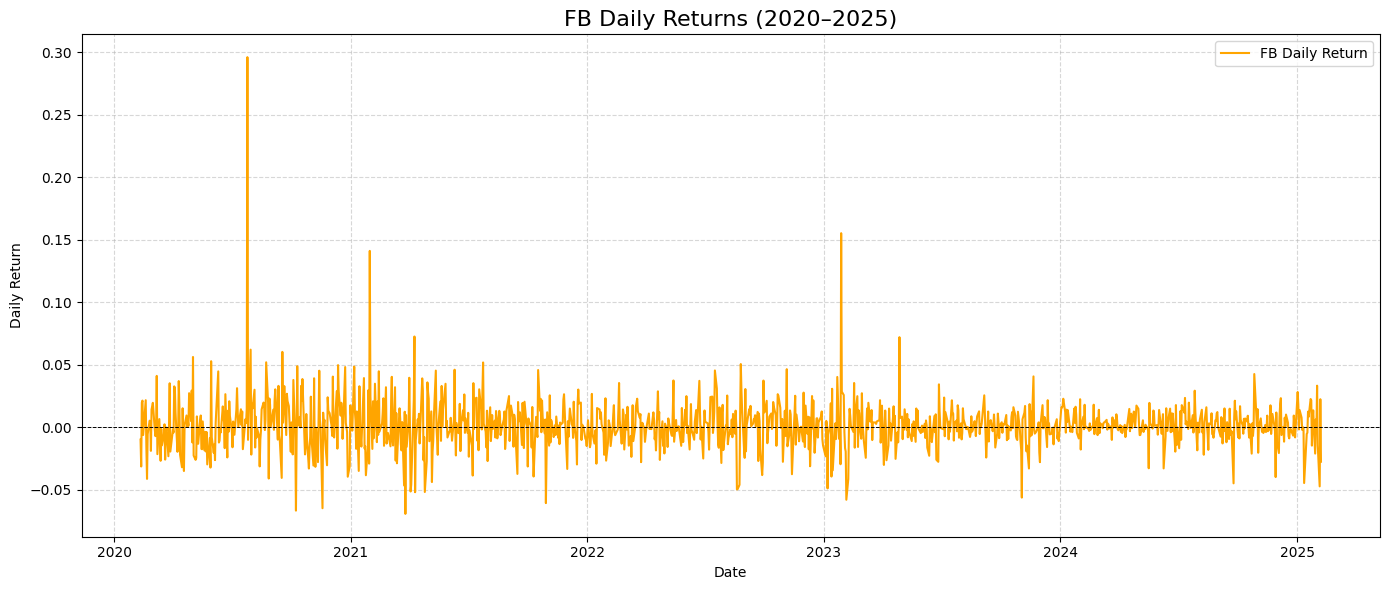

Name  Name_encoded
0       AAL             1
1       AAL             1
2       AAL             1
3       AAL             1
4       AAL             1
...     ...           ...
619035  ZTS           504
619036  ZTS           504
619037  ZTS           504
619038  ZTS           504
619039  ZTS           504

[619040 rows x 2 columns]

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from sklearn.linear_model import LinearRegression

# Read the CSV with no header and assign column names, skipping the first row
df=pd.read_csv('/content/all_stocks_5yr.csv', header=None, names=['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], skiprows=1)

df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'] + pd.DateOffset(years=7)
df.to_csv("all_stocks_5yr_shifted_2020_2025.csv", index=False)
print(df[['date', 'Name']].head())

#data inspection
df.info()
df.describe()
display(df.head())
df.shape
df.columns
df['Name'].unique()[:10]

#data cleaning
df.isnull().sum()
df.duplicated().sum()
print("From:", df['date'].min(), "To:", df['date'].max())
df.value_counts().head(10)
df.fillna(0,inplace=True)


#american airline closing price
sample_company = df[df['Name'] == 'AAPL'].copy()
plt.figure(figsize=(14, 6))
plt.plot(sample_company['date'], sample_company['close'], label='Close Price')
plt.title('American airline Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

df['date'] = pd.to_datetime(df['date'])

# Plot: Distribution of closing prices
plt.figure(figsize=(12, 6))
sns.histplot(df['close'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Daily Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

df['date'] = pd.to_datetime(df['date'])
df_avg_close = df.groupby('date')['close'].mean()
plt.figure(figsize=(14, 6))
plt.plot(df_avg_close.index, df_avg_close.values, label='Average Close Price', color='orange')
plt.title('Average Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.legend()
plt.show()

import seaborn as sns
plt.figure(figsize=(14, 6))
top_volume = df.groupby('Name')['volume'].sum().nlargest(5)
sns.barplot(x=top_volume.index, y=top_volume.values, palette='viridis')
plt.title('Top 5 Stocks by Total Volume')
plt.xlabel('Stock Symbol')
plt.ylabel('Total Volume')
plt.show()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_company, x='low', y='high', alpha=0.5)
plt.title('AAPL Daily High vs. Low Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)
plt.show()

sample_company = df[df['Name'] == 'AAPL'].copy()
sample_company['date'] = pd.to_datetime(sample_company['date'])
sample_company.set_index('date', inplace=True)
monthly_avg = sample_company['close'].resample('ME').mean()
plt.figure(figsize=(14, 6))
monthly_avg.plot()
plt.title('AAPL Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Avg Close Price')
plt.grid(True)
plt.show()

company_avg = df.groupby("Name")[["open", "high", "low", "close", "volume"]].mean()
correlation_matrix = company_avg.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Average Stock Metrics Across All Companies")
plt.tight_layout()
plt.show()

#volatility stocks
#Volatility refers to the degree of variation or fluctuation in a stock’s price over time
df['daily_return'] = df.groupby('Name')['close'].pct_change()
volatility = df.groupby('Name')['daily_return'].std().sort_values(ascending=False)
top_10_volatile = volatility.head(10).reset_index()
top_10_volatile.columns = ['Stock', 'Volatility']
plt.figure(figsize=(12, 6))
plt.bar(top_10_volatile['Stock'], top_10_volatile['Volatility'], color='tomato')
plt.title("Top 10 Most Volatile Stocks (Based on Daily Returns)", fontsize=14)
plt.xlabel("Stock")
plt.ylabel("Volatility (Standard Deviation of Daily Returns)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df['date'] = pd.to_datetime(df['date'])

# Filter for Amazon (AMZN)
amzn = df[df['Name'] == 'AMZN']
plt.figure(figsize=(14, 6))
plt.plot(amzn['date'], amzn['high'], label='High Price', color='green', alpha=0.6)
plt.plot(amzn['date'], amzn['low'], label='Low Price', color='red', alpha=0.6)
plt.fill_between(amzn['date'], amzn['low'], amzn['high'], color='gray', alpha=0.2)
plt.title('AMZN Daily High vs Low Prices (5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#FB
fb_df = df[df['Name'] == 'FB'].copy()
fb_df['daily_return'] = fb_df['close'].pct_change()
plt.figure(figsize=(14, 6))
plt.plot(fb_df['date'], fb_df['daily_return'], label='FB Daily Return', color='orange')
plt.title('FB Daily Returns (2020–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("all_stocks_5yr.csv")
df['date'] = pd.to_datetime(df['date'])
stock_df = df[df['Name'] == 'AAPL'].copy()
stock_df.sort_values('date', inplace=True)
stock_df['prev_close'] = stock_df['close'].shift(1)
stock_df['daily_return_pct'] = (stock_df['close'] - stock_df['prev_close']) / stock_df['prev_close']
stock_df['rolling_mean_5'] = stock_df['close'].rolling(5).mean()
stock_df['rolling_std_5'] = stock_df['close'].rolling(5).std()
stock_df['volume_change'] = stock_df['volume'].pct_change()
stock_df['high_low_ratio'] = stock_df['high'] / stock_df['low']
stock_df['close_open_ratio'] = stock_df['close'] / stock_df['open']
for i in range(1, 4):
    stock_df[f'lag_{i}'] = stock_df['close'].shift(i)
stock_df['target'] = (stock_df['close'].shift(-1) > stock_df['close']).astype(int)
stock_df.dropna(inplace=True)
features = ['open', 'high', 'low', 'close', 'volume', 'prev_close', 'daily_return_pct',
            'rolling_mean_5', 'rolling_std_5', 'volume_change',
            'high_low_ratio', 'close_open_ratio', 'lag_1', 'lag_2', 'lag_3']
X = stock_df[features]
y = stock_df['target']
le = LabelEncoder()
df['Name_encoded'] = le.fit_transform(df['Name'])
display(df[['Name', 'Name_encoded']])


